In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import pipeline

In [43]:
New_train=pd.read_csv('/home/ganesh/Projects/ResoluteAI/Project2/Data/New_train.csv')
New_train

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,...,T12,T13,T14,T15,T16,T17,T18,target,B_target,int_target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,...,-66,-61,-59,-73,-75,-63,-77,B37,0,-37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,...,-75,-74,-61,-64,-63,-53,-63,B61,0,-61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,...,-53,-66,-68,-72,-60,-68,-77,A19,1,19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,...,-60,-64,-83,-69,-72,-95,-73,A22,1,22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,...,-57,-54,-76,-61,-66,-71,-80,A33,1,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36747,-68,-62,-64,-59,-59,-71,-67,-73,-73,-69,...,-75,-56,-68,-68,-75,-75,-95,B34,0,-34
36748,-56,-50,-57,-50,-59,-60,-62,-69,-58,-64,...,-61,-58,-56,-60,-58,-59,-64,B15,0,-15
36749,-42,-58,-72,-70,-75,-72,-76,-84,-84,-59,...,-68,-65,-81,-86,-70,-75,-74,A6,1,6
36750,-50,-50,-70,-64,-64,-68,-68,-73,-79,-58,...,-73,-67,-77,-73,-74,-72,-81,B2,0,-2


In [44]:
X=New_train.drop(['target','B_target','int_target'],axis=1)
Positive_X=X.apply(abs)
Y_target=New_train['target']
Y_B_target=New_train['B_target']
Y_int_target=New_train['int_target']

## Y_target=New_train['target']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,Y_target, test_size=0.30, random_state=42)

In [46]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

## Random Forest Classifier
Here are some of the reasons why random forest is a good choice for classification:

* It is a non-parametric algorithm, which means that it does not make any assumptions about the underlying distribution of the data.
* It is robust to outliers.
* It can handle high-dimensional data.
* It is relatively easy to interpret.
* It is computationally efficient.

Here are some of the features of random forest:

* It is a collection of decision trees.
* Each tree is built using a random subset of the data.
* The trees are then combined using a voting scheme.
* The random forest algorithm is able to learn from the mistakes of individual trees.
* This makes it more robust to overfitting than other classification algorithms.

Random forest is a powerful and versatile algorithm that can be used to solve a variety of problems. It is a good choice for classification when you need an algorithm that is robust to outliers, can handle high-dimensional data, and is relatively easy to interpret

In [47]:
GNB=GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

## Naive Bayes Classifier
The naive Bayes classifier is also very efficient, which makes it a good choice for large datasets.

Here are some of the features of the naive Bayes classifier:

* It is a simple probabilistic classifier based on Bayes' theorem.
* It assumes that the features are independent.
* It is very efficient.
* It is easy to understand and implement.
* It is not very accurate for complex datasets.
* It can be sensitive to outliers.

In [48]:
Dtree=tree.DecisionTreeClassifier()
Dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Decision Tree Classifier

Here are some of the features of decision trees:

* Easy to understand and interpret: Decision trees are a relatively simple algorithm, and they can be easily understood by humans. This makes them a good choice for tasks where interpretability is important, such as medical diagnosis or fraud detection.
* Can handle both continuous and categorical data: Decision trees can be used to handle both continuous and categorical data. This makes them a versatile algorithm that can be applied to a wide range of problems.
* Robust to noise in the data: Decision trees are relatively robust to noise in the data. This means that they can still perform well even if the data is not perfect.
* Can be easily parallelized: Decision trees can be easily parallelized, which makes them a good choice for large datasets.

However, decision trees also have some limitations:

* Can be overfitting: Decision trees can be prone to overfitting, which means that they can learn the training data too well and not generalize well to new data.
* Can be computationally expensive: Decision trees can be computationally expensive to train, especially for large datasets.
* Can be difficult to tune: Decision trees can be difficult to tune, and it can be difficult to find the best parameters for a given problem.

In [49]:
y_pred_gnb=GNB.predict(X_test)
y_pred_Dtree=Dtree.predict(X_test)
y_pred_RFC=RFC.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
A_score_gnb=accuracy_score(y_test,y_pred_gnb)
A_score_Dtree=accuracy_score(y_test,y_pred_Dtree)
A_score_RFC=accuracy_score(y_test,y_pred_RFC)

In [52]:
confusion_matrix_gnb=confusion_matrix(y_test,y_pred_gnb)
confusion_matrix_Dtree=confusion_matrix(y_test,y_pred_Dtree)
confusion_matrix_RFC=confusion_matrix(y_test,y_pred_RFC)

In [53]:
A_score_gnb

0.957917649192817

In [54]:
A_score_Dtree

0.9645383638672229

In [55]:
A_score_RFC

0.9866678759296209

## Random Forest Classifier : 98.65 Persent  Accuracy

In [15]:
#confusion_matrix_gnb

In [16]:
#confusion_matrix_Dtree

In [17]:
#confusion_matrix_RFC

## Y_int_target=New_train['int_target']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(Positive_X,Y_int_target, test_size=0.30, random_state=42)

In [19]:
GNB=GaussianNB()
Dtree=tree.DecisionTreeClassifier()
RFC=RandomForestClassifier()

GNB.fit(X_train,y_train)
Dtree.fit(X_train,y_train)
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [20]:
y_pred_gnb=GNB.predict(X_test)
y_pred_Dtree=Dtree.predict(X_test)
y_pred_RFC=RFC.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [22]:
A_score_gnb=accuracy_score(y_test,y_pred_gnb)
A_score_Dtree=accuracy_score(y_test,y_pred_Dtree)
A_score_RFC=accuracy_score(y_test,y_pred_RFC)

In [23]:
confusion_matrix_gnb=confusion_matrix(y_test,y_pred_gnb)
confusion_matrix_Dtree=confusion_matrix(y_test,y_pred_Dtree)
confusion_matrix_RFC=confusion_matrix(y_test,y_pred_RFC)

In [24]:
A_score_gnb

0.957917649192817

In [25]:
A_score_Dtree

0.9628151641574461

In [26]:
A_score_RFC

0.9861237076002176

In [27]:
#confusion_matrix_gnb

In [28]:
#confusion_matrix_Dtree

In [29]:
confusion_matrix_RFC

array([[59,  0,  0, ...,  0,  0,  0],
       [ 0, 58,  0, ...,  0,  0,  0],
       [ 0,  0, 66, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 70,  0,  0],
       [ 0,  0,  0, ...,  0, 63,  0],
       [ 0,  0,  0, ...,  0,  0, 62]])

<Axes: >

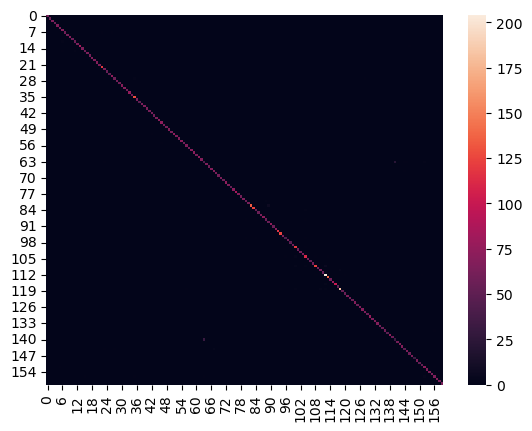

In [30]:
sns.heatmap(confusion_matrix_RFC)

In [32]:
import joblib

joblib.dump(RFC,filename='../../Project2/Models/RFC.pkl')
joblib.dump(GNB,filename='../../Project2/Models/GNB.pkl')
joblib.dump(Dtree,filename='../../Project2/Models/Dtree.pkl')

['../../Project2/Models/Dtree.pkl']

In [33]:
Load_RFC=joblib.load('../../Project2/Models/RFC.pkl')
Load_RFC

RandomForestClassifier()

In [34]:
test=pd.read_csv('../../Project2/Data/test.csv')
test

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-76,-83,-70,-66,-64,-72,-64,-69,-60,-76,-83,-78,-81,-81,-81,-70,-60,-60
1,-58,-57,-78,-81,-73,-73,-78,-78,-82,-49,-55,-58,-66,-79,-72,-83,-74,-80
2,-70,-70,-71,-69,-69,-68,-61,-55,-53,-82,-87,-76,-68,-57,-64,-75,-57,-70
3,-71,-61,-56,-56,-61,-60,-68,-66,-72,-58,-55,-56,-58,-62,-61,-59,-64,-65
4,-72,-71,-64,-69,-64,-63,-61,-42,-55,-61,-69,-67,-63,-63,-55,-49,-49,-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15747,-64,-68,-64,-67,-66,-53,-61,-51,-44,-76,-64,-62,-68,-60,-58,-54,-48,-51
15748,-57,-46,-64,-55,-56,-54,-70,-64,-63,-51,-56,-58,-60,-61,-61,-62,-62,-64
15749,-76,-67,-69,-71,-68,-70,-57,-57,-59,-76,-85,-72,-67,-58,-66,-66,-55,-54
15750,-69,-78,-65,-65,-38,-55,-66,-66,-76,-64,-64,-66,-55,-60,-55,-64,-66,-69


In [66]:
test_pred=RFC.predict(test)
test_prediction = pd.DataFrame(test_pred, columns=['Column_A'])
test_prediction

,Column_A
0,B74
1,A10
2,B65
3,B20
4,A67
...,...
15747,A71
15748,B11
15749,B69
15750,A38


In [57]:
test_pred=GNB.predict(test)
test_pred

array(['B74', 'A10', 'B65', ..., 'B69', 'A38', 'A80'], dtype='<U3')

In [58]:
test_pred=Dtree.predict(test)
test_pred

array(['B74', 'A10', 'B65', ..., 'B69', 'A38', 'A80'], dtype=object)

In [59]:
np.unique(test_pred,return_counts=True)

(array(['A1', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17',
        'A18', 'A19', 'A2', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25',
        'A26', 'A27', 'A28', 'A29', 'A3', 'A30', 'A31', 'A32', 'A33',
        'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A4', 'A40', 'A41',
        'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49', 'A5',
        'A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58',
        'A59', 'A6', 'A60', 'A61', 'A62', 'A63', 'A64', 'A65', 'A66',
        'A67', 'A68', 'A69', 'A7', 'A70', 'A71', 'A72', 'A73', 'A74',
        'A75', 'A76', 'A77', 'A78', 'A79', 'A8', 'A80', 'A9', 'B1', 'B10',
        'B11', 'B12', 'B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19',
        'B2', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27',
        'B28', 'B29', 'B3', 'B30', 'B31', 'B32', 'B33', 'B34', 'B35',
        'B36', 'B37', 'B38', 'B39', 'B4', 'B40', 'B41', 'B42', 'B43',
        'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B5', 'B50', 'B51',
        'B52'

In [62]:
pre=RFC.predict([[-76, -83, -70,-66 ,-64 ,-72 ,-64 ,-69 ,-60 ,-76,-83,-78,-81 ,-81 ,-81 ,-70,-60 ,-60]])

/home/ganesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [63]:
pre

array(['B74'], dtype=object)

In [64]:
pre=GNB.predict([[-76, -83, -70,-66 ,-64 ,-72 ,-64 ,-69 ,-60 ,-76,-83,-78,-81 ,-81 ,-81 ,-70,-60 ,-60]])

/home/ganesh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [42]:
pre

array([39])